# Haberman cancer survival EDA

# Data Description 
The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.



# Attribute Information:

1)Age of patient at time of operation (numerical)

2)Patient's year of operation (year - 1900, numerical)

3)Number of positive axillary nodes detected (numerical)

4)Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

It's a complete data exploration notebook to prepare your data for predictive analysis. Let's get started

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation


In [32]:
'''downlaod haberman.csv from https://www.kaggle.com/datasets/gilsousa/habermans-survival-data-set?resource=download'''
#Load haberman.csv into a pandas dataFrame.
cancer = pd.read_csv(r'C:\Users\vipulvm\Downloads\haberman/haberman.csv', header=None, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])

In [33]:
cancer.shape

(306, 4)

In [34]:
#(Q) what are the columnnames in our dataset?
print(cancer.columns)

Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')


In [35]:
cancer.head() #first 5 rows

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [36]:
cancer.tail() #first 5 rows

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [37]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            306 non-null    int64
 1   year_of_treatment              306 non-null    int64
 2   positive_lymph_nodes           306 non-null    int64
 3   survival_status_after_5_years  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


# Observations:
There are no missing values in this dataset. So there is no need to do data imputation.
The datatype of 'survival_status_after_5_years' column is integer. It has to be converted to categorical datatype.
The values of 'survival_status_after_5_years' column are not meanigful. Hence they are mapped to 'yes' (survived after 5 years) and 'no' (not survived after 5 years)

In [38]:
# print the unique valuesof the target column
print(list(cancer['survival_status_after_5_years'].unique()))

[1, 2]


In [39]:
# modify the target column values to be meaningful as well as categorical
cancer['survival_status_after_5_years'] = cancer['survival_status_after_5_years'].map({1:"yes", 2:"no"})
cancer['survival_status_after_5_years'] = cancer['survival_status_after_5_years'].astype('category')
print(cancer.head())

   age  year_of_treatment  positive_lymph_nodes survival_status_after_5_years
0   30                 64                     1                           yes
1   30                 62                     3                           yes
2   30                 65                     0                           yes
3   31                 59                     2                           yes
4   31                 65                     4                           yes


In [40]:
print(cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            306 non-null    int64   
 1   year_of_treatment              306 non-null    int64   
 2   positive_lymph_nodes           306 non-null    int64   
 3   survival_status_after_5_years  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB
None


# High Level Statistics

In [41]:
cancer.describe()

,age,year_of_treatment,positive_lymph_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [42]:
print("Number of rows: " + str(cancer.shape[0]))
print("Number of columns: " + str(cancer.shape[1]))
print("Columns: " + ", ".join(cancer.columns))

print("Target variable distribution")
print(cancer.iloc[:,-1].value_counts())
print("*"*50)
print(cancer.iloc[:,-1].value_counts(normalize = True)) #normalise=true returs the frequency

Number of rows: 306
Number of columns: 4
Columns: age, year_of_treatment, positive_lymph_nodes, survival_status_after_5_years
Target variable distribution
yes    225
no      81
Name: survival_status_after_5_years, dtype: int64
**************************************************
yes    0.735294
no     0.264706
Name: survival_status_after_5_years, dtype: float64


In [43]:
cancer["age"].median()

52.0

# Observations:
- The age of the patients vary from 30 to 83 with the median of 52.

- Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes

- The dataset contains only a small number of records (306).

- The target column is imbalanced with 73% of values are 'yes'

# Objective
To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes

# Univariate Analysis

In [44]:
import seaborn as sns

C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


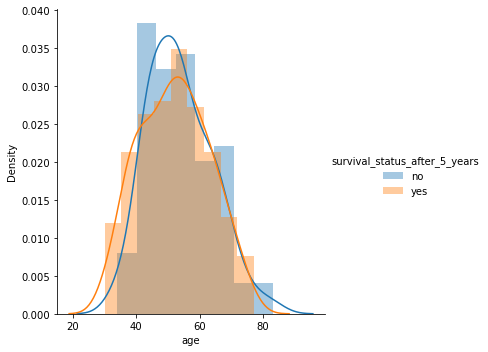

In [45]:
sns.FacetGrid(cancer,hue="survival_status_after_5_years",size=5) \
   .map(sns.distplot,"age") \
   .add_legend();
plt.show();

C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


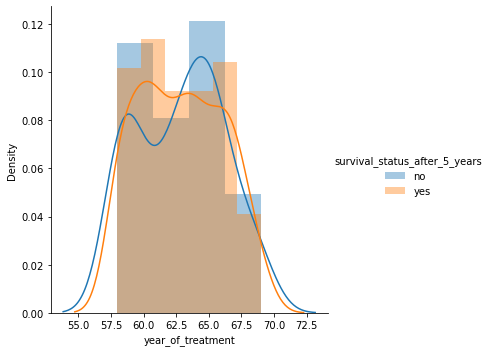

In [47]:
sns.FacetGrid(cancer,hue="survival_status_after_5_years",size=5) \
   .map(sns.distplot,"year_of_treatment") \
   .add_legend();
plt.show();

C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


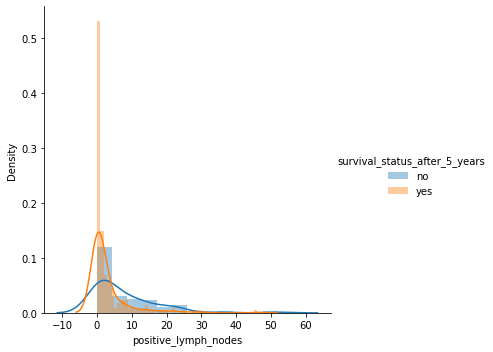

In [48]:
sns.FacetGrid(cancer,hue="survival_status_after_5_years",size=5) \
   .map(sns.distplot,"positive_lymph_nodes") \
   .add_legend();
plt.show();

C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


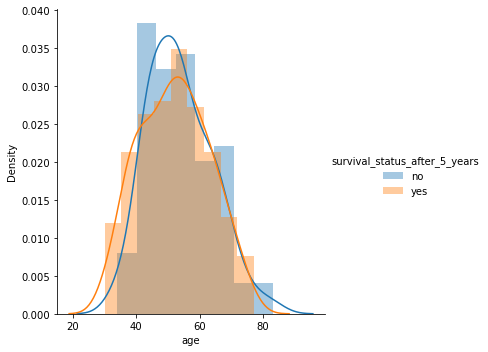

C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


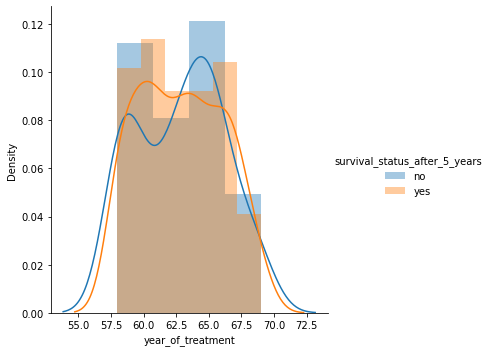

C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vipulvm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


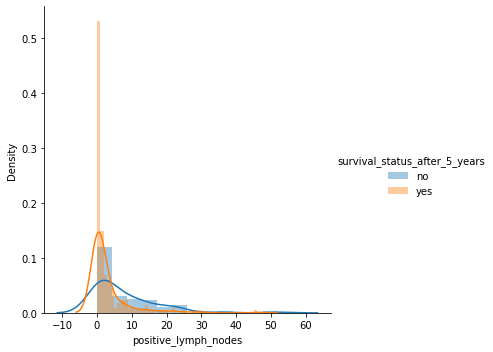

In [50]:
#5.1 Distribution plots
"""
* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points 
lie within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group
"""
for idx, feature in enumerate(list(cancer.columns)[:-1]):
    fg = sns.FacetGrid(cancer, hue='survival_status_after_5_years', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* year_of_treatment *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* positive_lymph_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.996732

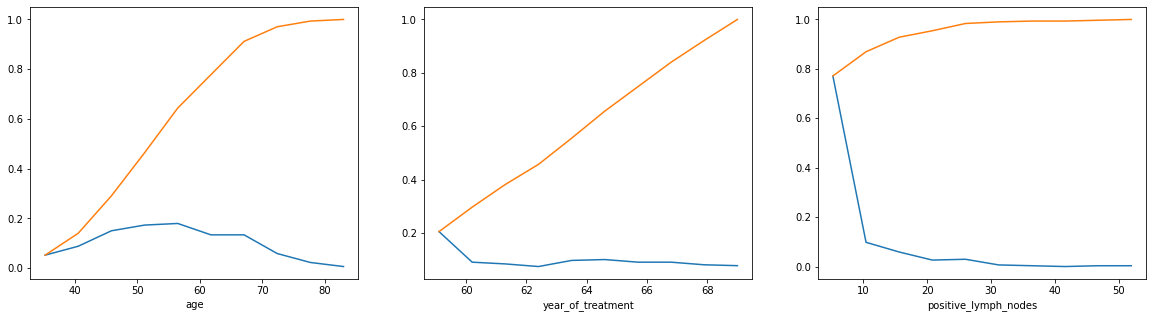

In [54]:
"""
The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.
"""
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(cancer.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(cancer[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

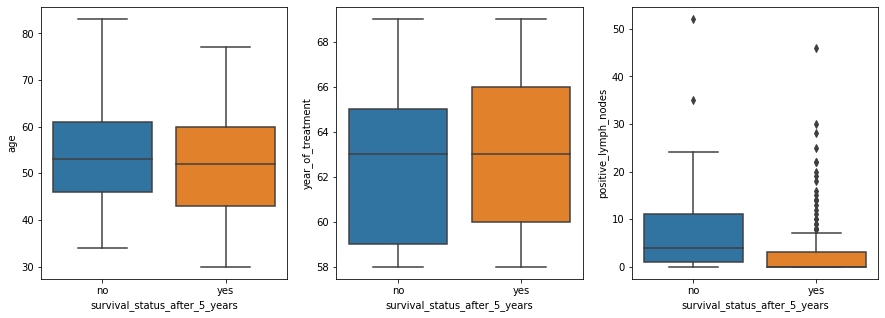

In [55]:
#5.3 Box Plots
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer.columns)[:-1]):
    sns.boxplot( x='survival_status_after_5_years', y=feature, data=cancer, ax=axes[idx])
plt.show() 

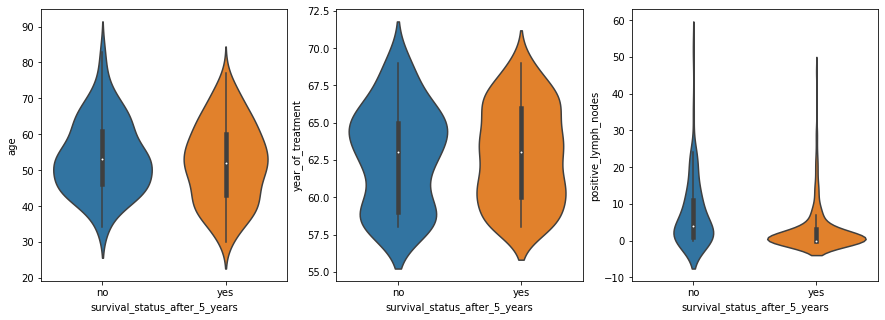

In [56]:
#5.4 Violin Plots
"""
Violin plot is the combination of box plot and probability density function.
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer.columns)[:-1]):
    sns.violinplot( x='survival_status_after_5_years', y=feature, data=cancer, ax=axes[idx])
plt.show()

# Observations¶
- The number of positive lymph nodes of the survivors is highly densed from 0 to 5. (#5.1)
- Almost 80% of the patients have less than or equal to 5 positive lymph nodea. (#5.2)
- The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest. (#5.3 and #5.4)

In [60]:
print("Quantiles:")
print(np.percentile(cancer["age"],np.arange(0,100,25)))
print(np.percentile(cancer["year_of_treatment"],np.arange(0,100,25)))
print(np.percentile(cancer["positive_lymph_nodes"],np.arange(0,100,25)))



Quantiles:
[30.   44.   52.   60.75]
[58.   60.   63.   65.75]
[0. 0. 1. 4.]


In [61]:
from statsmodels import robust
print("\nMedian Absolute  Deviation")
print(robust.mad(cancer["age"]))

print(robust.mad(cancer["year_of_treatment"]))
print(robust.mad(cancer["positive_lymph_nodes"]))


Median Absolute  Deviation
11.860817748044816
4.447806655516806
1.482602218505602


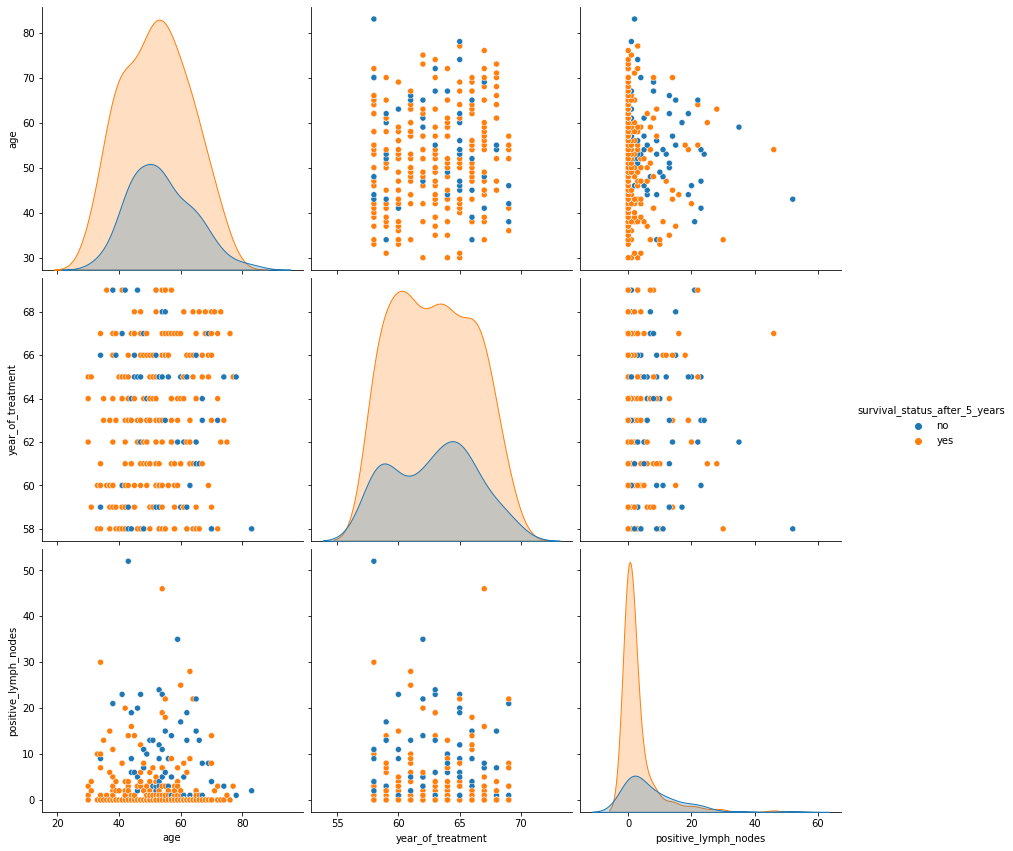

In [63]:
# pair plot
"""
Pair plot in seaborn plots the scatter plot between every two data columns in a given dataframe.
It is used to visualize the relationship between two variables
"""
sns.pairplot(cancer, hue='survival_status_after_5_years', height=4)
plt.show()#total number of pairplots is 3c2

# Observations
- By scattering the data points between year_of_treatment and positive_lymph_nodes, we can see the better seperation between the two clases than other scatter plots.

# As it's a classification problem. We are going to use a classification algorithms to build a model. Let's begin


In [64]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

 Now, we are going to split the data in training and testing sets.


In [65]:
train, test = train_test_split(cancer, test_size = 0.3) #  I am taking the attribute test_size=0.3
print(train.shape)
print(test.shape)

(214, 4)
(92, 4)


In [67]:
train_X = train[['age','year_of_treatment','positive_lymph_nodes']]# taking the training data features
train_y=train.survival_status_after_5_years # output of our training data
test_X= test[['age','year_of_treatment','positive_lymph_nodes']] # taking test data features
test_y =test.survival_status_after_5_years   #output value of test data

In [68]:
train_X.head()

,age,year_of_treatment,positive_lymph_nodes
6,33,60,0
262,65,58,0
216,59,60,0
180,55,63,6
235,61,65,8


In [69]:
test_X.head()

,age,year_of_treatment,positive_lymph_nodes
79,44,67,16
287,70,66,14
133,50,64,0
297,73,62,0
288,70,67,0


In [70]:
train_y.head()

6      yes
262    yes
216    yes
180     no
235    yes
Name: survival_status_after_5_years, dtype: category
Categories (2, object): ['no', 'yes']

# Support Vector Machine (SVM) :

In [71]:
# Applying SVM
model = svm.SVC() 
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

The accuracy of the SVM is: 0.7391304347826086


the dataset has less number of points thats why the accuracy is low

# Logistic Regression:

In [72]:
# Applying logistic regression
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.782608695652174


# Decision Tree:

In [73]:
# Applying decision tree
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.6630434782608695


# K-Nearest Neighbors :

In [74]:
odel=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.6847826086956522
